# Example on how to train a DQN for the created connfect four encironment
This notebook, shows and explains how an AI model can be used to learn how to play the game connect four using reinforcement learning.

## Import packages

In [1]:
import sys
import os
import numpy as np
import random

sys.path.append(os.path.join('..', 'code'))
from connectFour import *
from agents import *

/Users/basvanderbijl/Library/Mobile Documents/com~apple~CloudDocs/DataGreen/projects/connectFour/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Setup environment

In [2]:
env = ConnectFourGymEnv()

## Train AI Model

In [3]:
input_shape = env.observation_space.flatten().shape
num_actions = len(env.action_space)
episodes = 5000
batch_size = 100

agent = DQNAgent(0, input_shape, num_actions, episodes, model_name="agentv2.hdf5")

In [4]:
# Monitoring devices
all_total_rewards = np.empty(episodes)
all_avg_rewards = np.empty(episodes)

start_state = env.reset()
start_state = np.reshape(start_state, (1,-1))
normalized_start_state = agent.normalize_board(start_state)

for e in range(episodes):
    state = env.reset()
    state = np.reshape(state, (1,-1))
    
    previous_state = None
    action = None
    
    total_rewards = 0
    gained_reward_on_turn = 0
    
    while not env.game_over:
        normalized_state = agent.normalize_board(state)
        previous_action = action
        
        if type(previous_state) == np.ndarray and env.current_player == agent.player_number:
            agent.memorize(previous_state, previous_action, gained_reward_on_turn, normalized_state, done)
            gained_reward_on_turn = 0
        
        action = agent.make_move(env.agent)
        new_state, reward, done, info = env.step(action)
        
        if agent.player_number == 1:
            reward = reward * -1
        
        previous_state = normalized_state.copy()
        state = np.reshape(new_state, (1,-1))
        
        gained_reward_on_turn += reward
        total_rewards += reward
    
    if env.current_player == agent.player_number:
        normalized_state = agent.normalize_board(state)
        agent.memorize(normalized_state, action, gained_reward_on_turn, normalized_start_state, done)
    else:
        agent.memorize(previous_state, previous_action, gained_reward_on_turn, normalized_state, done)
    
    agent.learn(batch_size)
    all_total_rewards[e] = total_rewards
    avg_reward = all_total_rewards[max(0, e - 100):e].mean()
    all_avg_rewards [e] = avg_reward
    
    if random.uniform(0, 1) < 0.5:
        agent.switch_side()
    
    if e % 100 == 0:
        print("episode: {}/{}, epsilon: {:.2f}, average: {:.2f}".format(e, episodes, agent.epsilon, avg_reward))
        agent.save("agentv2.hdf5")


/var/folders/cf/p0nq_b1n2qz16slztg1n2z2c0000gn/T/ipykernel_38415/2289653598.py:44: RuntimeWarning: Mean of empty slice.
  avg_reward = all_total_rewards[max(0, e - 100):e].mean()
/Users/basvanderbijl/Library/Mobile Documents/com~apple~CloudDocs/DataGreen/projects/connectFour/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/basvanderbijl/Library/Mobile Documents/com~apple~CloudDocs/DataGreen/projects/connectFour/.venv/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


episode: 0/5000, epsilon: 0.10, average: nan
episode: 100/5000, epsilon: 0.10, average: 0.19
episode: 200/5000, epsilon: 0.09, average: 0.26
episode: 300/5000, epsilon: 0.08, average: 0.21
episode: 400/5000, epsilon: 0.08, average: -0.05
episode: 500/5000, epsilon: 0.08, average: 0.01
episode: 600/5000, epsilon: 0.07, average: 0.17
episode: 700/5000, epsilon: 0.07, average: 0.16
episode: 800/5000, epsilon: 0.06, average: 0.07
episode: 900/5000, epsilon: 0.06, average: 0.22
episode: 1000/5000, epsilon: 0.06, average: 0.01
episode: 1100/5000, epsilon: 0.05, average: 0.14
episode: 1200/5000, epsilon: 0.05, average: 0.41
episode: 1300/5000, epsilon: 0.05, average: 0.07
episode: 1400/5000, epsilon: 0.05, average: 0.25
episode: 1500/5000, epsilon: 0.04, average: 0.26
episode: 1600/5000, epsilon: 0.04, average: 0.15
episode: 1700/5000, epsilon: 0.04, average: 0.28
episode: 1800/5000, epsilon: 0.04, average: 0.15
episode: 1900/5000, epsilon: 0.03, average: 0.12
episode: 2000/5000, epsilon: 0.0

KeyboardInterrupt: 

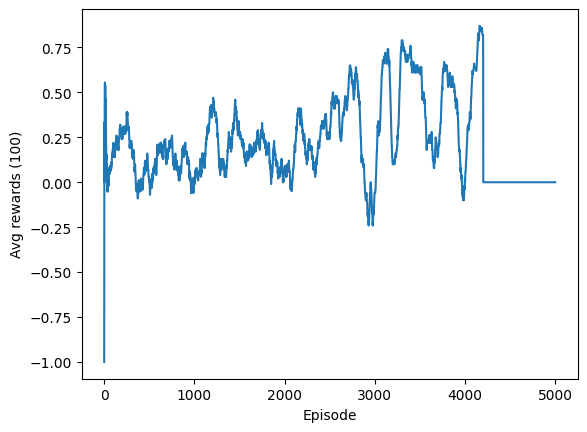

In [5]:
import matplotlib.pyplot as plt

plt.plot(all_avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Avg rewards (100)')
plt.show()